<a href="https://www.kaggle.com/code/nahidsarkar/bitcoinpriceprediction?scriptVersionId=278026235" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cryptocurrencypricehistory/coin_ChainLink.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cardano.csv
/kaggle/input/cryptocurrencypricehistory/coin_Solana.csv
/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Polkadot.csv
/kaggle/input/cryptocurrencypricehistory/coin_NEM.csv
/kaggle/input/cryptocurrencypricehistory/coin_XRP.csv
/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv
/kaggle/input/cryptocurrencypricehistory/coin_Aave.csv
/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cosmos.csv
/kaggle/input/cryptocurrencypricehistory/coin_Litecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Uniswap.csv
/kaggle/input/cryptocurrencypricehistory/coin_EOS.csv
/kaggle/input/cryptocurrencypricehistory/coin_BinanceCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_CryptocomCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_USDCoin.csv
/kaggle/input/c

In [113]:
bitcoin_df = pd.read_csv('/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv')

In [114]:
bitcoin_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [115]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [116]:
bitcoin_df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [117]:
bitcoin_df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


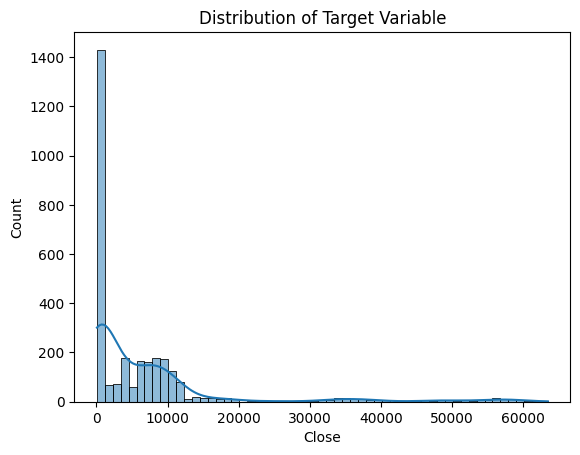

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=bitcoin_df, x='Close', kde=True)
plt.title('Distribution of Target Variable')
plt.show()

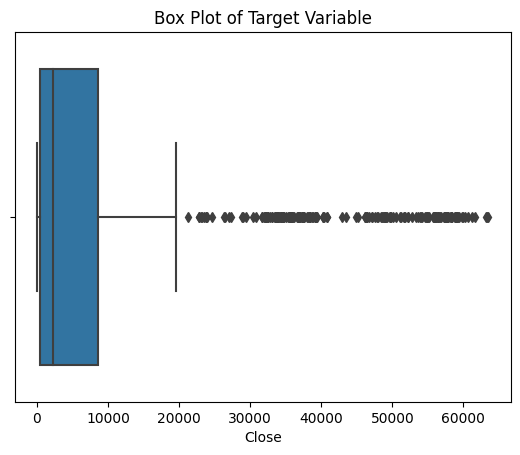

In [119]:
sns.boxplot(data=bitcoin_df, x='Close')
plt.title('Box Plot of Target Variable')
plt.show()

In [120]:
bitcoin_df.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [121]:
bitcoin_df.duplicated().sum()

0

In [122]:
bitcoin_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


--- Correlation Matrix (Text) ---
               High       Low      Open     Close    Volume  Marketcap
High       1.000000  0.998841  0.999442  0.999417  0.810464   0.999094
Low        0.998841  1.000000  0.998905  0.999291  0.803110   0.999072
Open       0.999442  0.998905  1.000000  0.998646  0.808439   0.998382
Close      0.999417  0.999291  0.998646  1.000000  0.807388   0.999709
Volume     0.810464  0.803110  0.808439  0.807388  1.000000   0.809156
Marketcap  0.999094  0.999072  0.998382  0.999709  0.809156   1.000000


Generating correlation heatmap...
Successfully saved heatmap as 'bitcoin_correlation_heatmap.png'


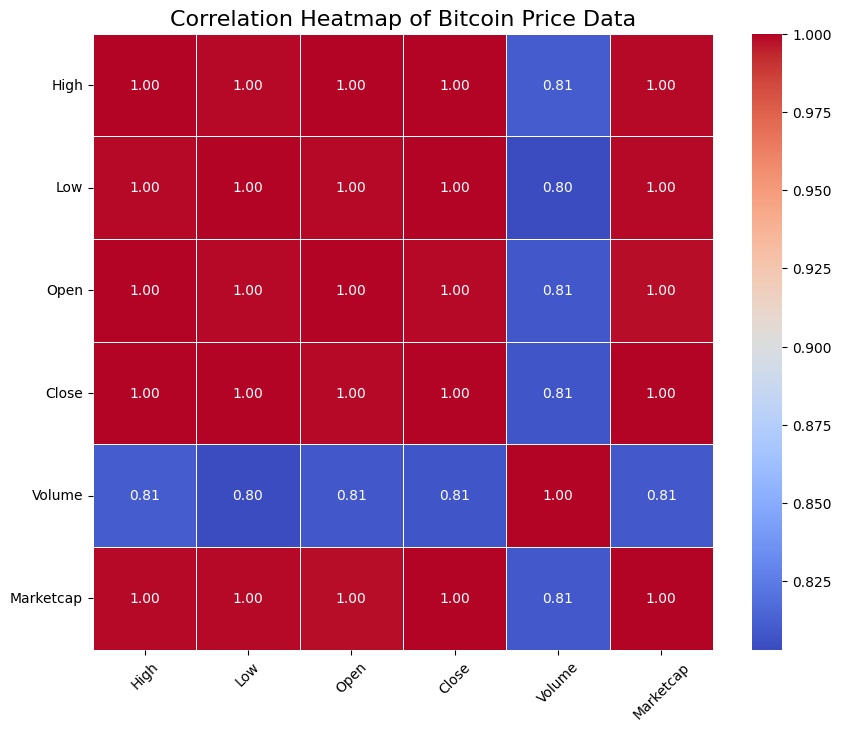

In [123]:
numeric_df = bitcoin_df.drop(columns=['SNo', 'Name', 'Symbol', 'Date'])

correlation_matrix = numeric_df.corr()

print("--- Correlation Matrix (Text) ---")
print(correlation_matrix)
print("\n")

print("Generating correlation heatmap...")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Bitcoin Price Data', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

heatmap_filename = 'bitcoin_correlation_heatmap.png'
plt.savefig(heatmap_filename)

print(f"Successfully saved heatmap as '{heatmap_filename}'")

In [124]:
bitcoin_df = bitcoin_df.drop(columns=['SNo', 'Name', 'Symbol'])

In [125]:
bitcoin_df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [126]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2991 non-null   object 
 1   High       2991 non-null   float64
 2   Low        2991 non-null   float64
 3   Open       2991 non-null   float64
 4   Close      2991 non-null   float64
 5   Volume     2991 non-null   float64
 6   Marketcap  2991 non-null   float64
dtypes: float64(6), object(1)
memory usage: 163.7+ KB


In [127]:
# Convert the column to datetime objects
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

print(bitcoin_df['Date'])

0      2013-04-29 23:59:59
1      2013-04-30 23:59:59
2      2013-05-01 23:59:59
3      2013-05-02 23:59:59
4      2013-05-03 23:59:59
               ...        
2986   2021-07-02 23:59:59
2987   2021-07-03 23:59:59
2988   2021-07-04 23:59:59
2989   2021-07-05 23:59:59
2990   2021-07-06 23:59:59
Name: Date, Length: 2991, dtype: datetime64[ns]


In [128]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2991 non-null   datetime64[ns]
 1   High       2991 non-null   float64       
 2   Low        2991 non-null   float64       
 3   Open       2991 non-null   float64       
 4   Close      2991 non-null   float64       
 5   Volume     2991 non-null   float64       
 6   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 163.7 KB


--- Skewness Scores ---
High         3.012925
Low          3.033504
Open         3.025191
Close        3.018634
Volume       3.742112
Marketcap    3.071752
dtype: float64

(A score > 1 or < -1 is considered highly skewed)

Generating histograms...
Histograms saved as 'feature_histograms.png'


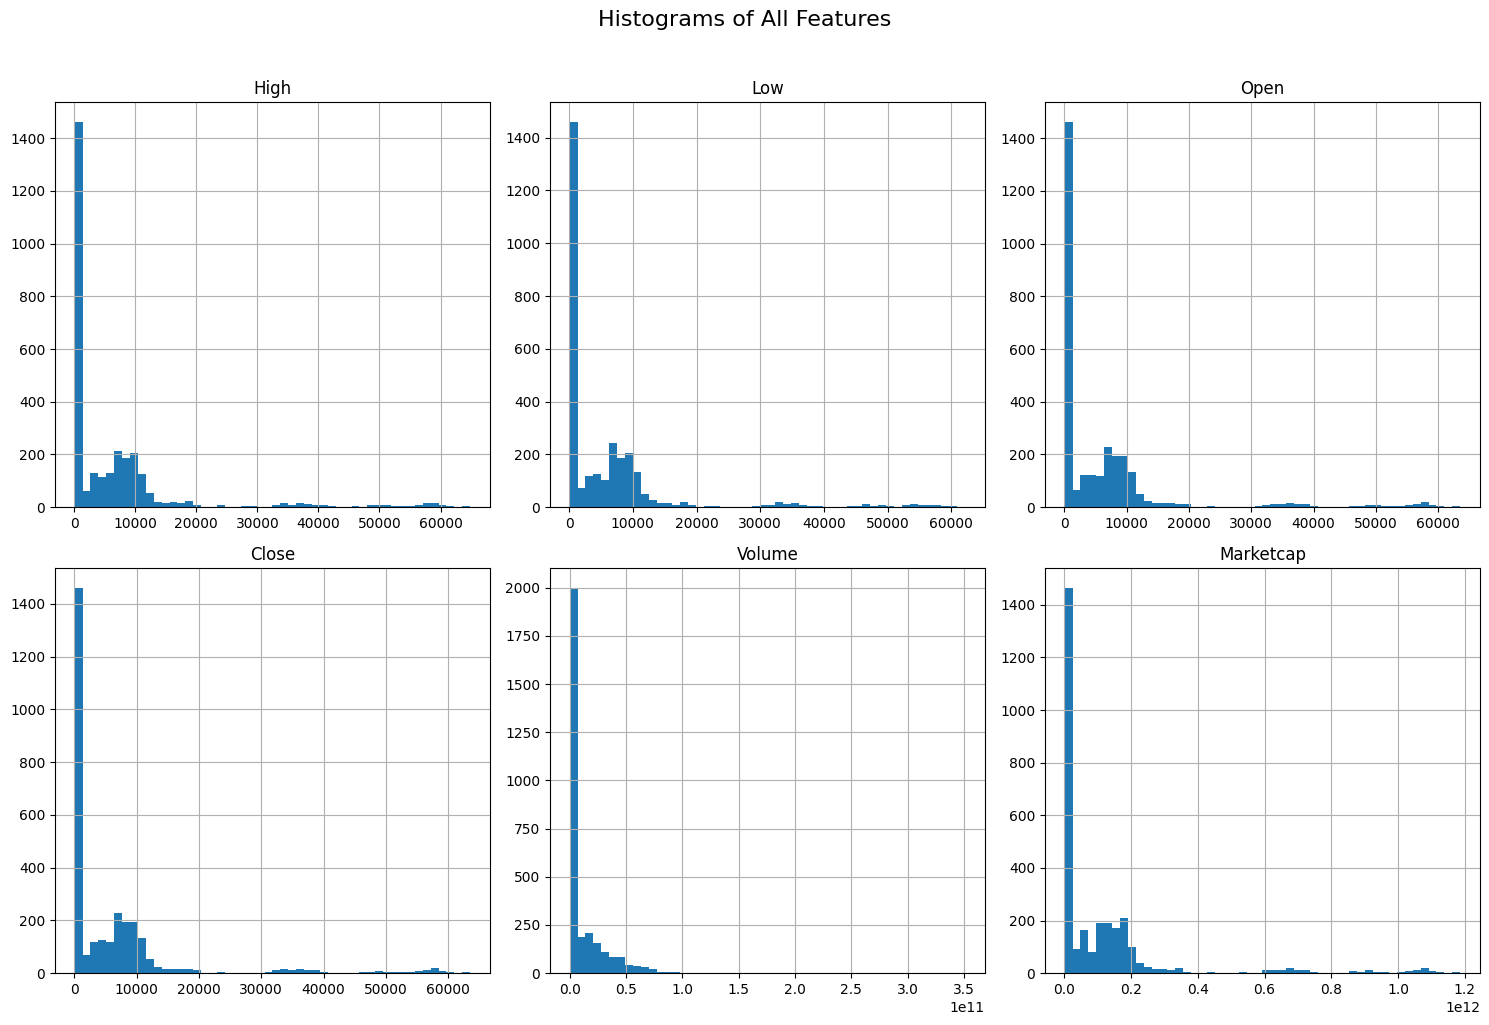

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

print("--- Skewness Scores ---")
skew_values = bitcoin_df[columns_to_check].skew()
print(skew_values)
print("\n(A score > 1 or < -1 is considered highly skewed)")


print("\nGenerating histograms...")
bitcoin_df[columns_to_check].hist(bins=50, figsize=(15, 10), layout=(2, 3))

plt.suptitle("Histograms of All Features", fontsize=16, y=1.02)
plt.tight_layout()

plt.savefig('feature_histograms.png')
print("Histograms saved as 'feature_histograms.png'")